# Analysis of Electoral Bond Purchases

"Analysis of Electoral Bond Purchases" provides insights into the distribution and trends of electoral bond purchases over a specified period. The analysis examines the total denomination amount, the top purchasers, and the yearly investment patterns, offering valuable information for understanding the financial aspects of electoral funding.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing DataSet

In [25]:
df = pd.read_csv(r"C:\Users\sarwat\Electoral_Bond\Electoral_Bond_Purchasers.csv")

In [26]:
df.head()

,Date of Purchase,Purchaser Name,Denomination,Unnamed: 3
0,12/Apr/2019,A B C INDIA LIMITED,100000,NaN
1,12/Apr/2019,A B C INDIA LIMITED,100000,NaN
2,12/Apr/2019,A B C INDIA LIMITED,1000000,NaN
3,12/Apr/2019,A B C INDIA LIMITED,1000000,NaN
4,12/Apr/2019,A B C INDIA LIMITED,100000,NaN


### Droping Unwanted Column

In [27]:
# Drop the column named 'Unnamed: 3'
df = df.drop(columns=['Unnamed: 3'])

# Display the first few rows of the DataFrame to verify the column has been dropped
df.head()

,Date of Purchase,Purchaser Name,Denomination
0,12/Apr/2019,A B C INDIA LIMITED,100000
1,12/Apr/2019,A B C INDIA LIMITED,100000
2,12/Apr/2019,A B C INDIA LIMITED,1000000
3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,12/Apr/2019,A B C INDIA LIMITED,100000


### Understand the structure and content of dataset

In [28]:
# Check the shape of the DataFrame (number of rows and columns)
print(df.shape)

(18871, 3)


In [29]:
# Check the data types of each column
print(df.dtypes)

Date of Purchase    object
Purchaser Name      object
Denomination         int64
dtype: object


In [30]:
# Check for missing values
print(df.isnull().sum())

Date of Purchase    0
Purchaser Name      0
Denomination        0
dtype: int64


In [31]:

# Get summary statistics
df.describe()

# # Convert DataFrame to string and print
# print("Summary Statistics:")
# print(summary_stats.to_string())

,Denomination
count,1.887100e+04
mean,6.441372e+06
std,4.538947e+06
min,1.000000e+03
25%,1.000000e+06
50%,1.000000e+07
75%,1.000000e+07
max,1.000000e+07


###  Converting into date and Extracting year 


In [32]:
# Convert 'Date of Purchase' column to datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# Extract year from 'Date of Purchase' column
df['Year'] = df['Date of Purchase'].dt.year

# Display the first few rows of the DataFrame with the new 'Year' column
df[['Date of Purchase', 'Year']].head()



,Date of Purchase,Year
0,2019-04-12,2019
1,2019-04-12,2019
2,2019-04-12,2019
3,2019-04-12,2019
4,2019-04-12,2019


In [33]:
# Add a new column for 'Denomination (Crore)'
df['Denomination(Crore)'] = df['Denomination'] / 10000000

In [34]:
df

,Date of Purchase,Purchaser Name,Denomination,Year,Denomination(Crore)
0,2019-04-12,A B C INDIA LIMITED,100000,2019,0.01
1,2019-04-12,A B C INDIA LIMITED,100000,2019,0.01
2,2019-04-12,A B C INDIA LIMITED,1000000,2019,0.10
3,2019-04-12,A B C INDIA LIMITED,1000000,2019,0.10
4,2019-04-12,A B C INDIA LIMITED,100000,2019,0.01
...,...,...,...,...,...
18866,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00
18867,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00
18868,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00
18869,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00


In [42]:
total_amount = df['Denomination(Crore)'].sum()
print(total_amount)

12155.5132


### Group by 'Purchaser Name' , and calculate the total 'Denomination' for each group


In [48]:
# Group by 'Purchaser Name' and sum the 'Denomination' column
grouped_data = df.groupby(['Purchaser Name'])['Denomination'].sum().reset_index()
# Display the updated grouped data
grouped_data['Denomination(Crore)'] = grouped_data['Denomination'] / 10000000
grouped_data.head()



,Purchaser Name,Denomination,Denomination(Crore)
0,14 REELS PLUS LLP,10000000,1.0
1,A B C INDIA LIMITED,4000000,0.4
2,AAKANKSHA BAHETY,1000000,0.1
3,AALAYA CONSTRUCTIONS,10000000,1.0
4,AARISH SOLAR POWER PRIVATE LIMITED,20000000,2.0


## Top 20 Purchasers

In [49]:
# Sort the grouped_data DataFrame by 'Denomination' in descending order
grouped_data_sorted = grouped_data.sort_values(by='Denomination', ascending=False)

# Get the top 20 purchasers
top_20_purchasers = grouped_data_sorted.head(20)

# Display the top 20 purchasers
print("Top 20 Purchasers:")
top_20_purchasers

Top 20 Purchasers:


,Purchaser Name,Denomination,Denomination(Crore)
354,FUTURE GAMING AND HOTEL SERVICES PR,12080000000,1208.00
652,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,8210000000,821.00
866,QWIKSUPPLYCHAINPRIVATELIMITED,4100000000,410.00
417,HALDIA ENERGY LIMITED,3770000000,377.00
1248,VEDANTA LIMITED,3756500000,375.65
334,ESSEL MINING AND INDS LTD,2245000000,224.50
1299,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,2200000000,220.00
556,KEVENTER FOODPARK INFRA LIMITED,1950000000,195.00
619,MADANLAL LTD.,1855000000,185.50
174,BHARTI AIRTEL LIMITED,1830000000,183.00


## Top 20 Purchasers by Total Denomination in Crore

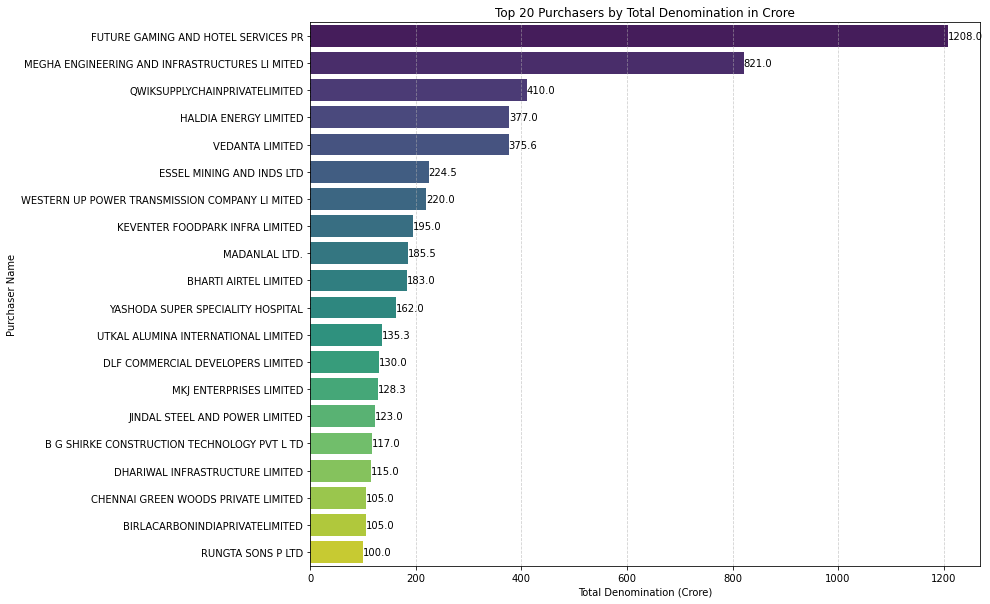

In [50]:
# Create a bar plot 
# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x='Denomination(Crore)', y='Purchaser Name', data=top_20_purchasers, palette='viridis')

# Add values on the bars
for index, value in enumerate(top_20_purchasers['Denomination(Crore)']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.xlabel('Total Denomination (Crore)')
plt.ylabel('Purchaser Name')
plt.title('Top 20 Purchasers by Total Denomination in Crore')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Count the number of purchases for each purchaser


In [51]:
# Count the number of purchases for each purchaser
purchase_counts = df['Purchaser Name'].value_counts()

# Display the purchase counts
purchase_counts

FUTURE GAMING AND HOTEL SERVICES PR               1208
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     821
QWIKSUPPLYCHAINPRIVATELIMITED                      410
HALDIA ENERGY LIMITED                              395
VEDANTA LIMITED                                    386
                                                  ... 
MR. SAMEER BHATIA                                    1
B.DAS AND ASSOCIATES PVT. LTD.                       1
J B ENTERPRISE                                       1
RAYALA SEEMA WIND ENERGY PVT LTD                     1
GORUKANTI SURENDER RAO                               1
Name: Purchaser Name, Length: 1316, dtype: int64

In [52]:
# Convert the purchase counts to a DataFrame
purchase_counts_df = purchase_counts.to_frame().reset_index()

# Rename the columns
purchase_counts_df.columns = ['Purchaser Name', 'Purchase Count']

# Display the DataFrame
print(purchase_counts_df.head())



                                   Purchaser Name  Purchase Count
0             FUTURE GAMING AND HOTEL SERVICES PR            1208
1  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED             821
2                   QWIKSUPPLYCHAINPRIVATELIMITED             410
3                           HALDIA ENERGY LIMITED             395
4                                 VEDANTA LIMITED             386


## Top 20 Purchasers by Purchase Count

In [53]:
# Sort the purchase counts DataFrame by 'Purchase Count' in ascending order
purchase_counts_df = purchase_counts_df.sort_values(by='Purchase Count', ascending=False)

# Display the top 20 purchasers in ascending order
top_purchasers = purchase_counts_df.head(20)
print(top_purchasers)

                                    Purchaser Name  Purchase Count
0              FUTURE GAMING AND HOTEL SERVICES PR            1208
1   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED             821
2                    QWIKSUPPLYCHAINPRIVATELIMITED             410
3                            HALDIA ENERGY LIMITED             395
4                                  VEDANTA LIMITED             386
5                        ESSEL MINING AND INDS LTD             238
6                          MKJ ENTERPRISES LIMITED             235
7                   TRANSWAYS EXIM PRIVATE LIMITED             226
8   WESTERN UP POWER TRANSMISSION COMPANY LI MITED             220
9                  KEVENTER FOODPARK INFRA LIMITED             204
10                                   MADANLAL LTD.             199
11                           BHARTI AIRTEL LIMITED             183
12               V M SALGAOCAR CORPORATION PVT LTD             163
13               YASHODA SUPER SPECIALITY HOSPITAL            

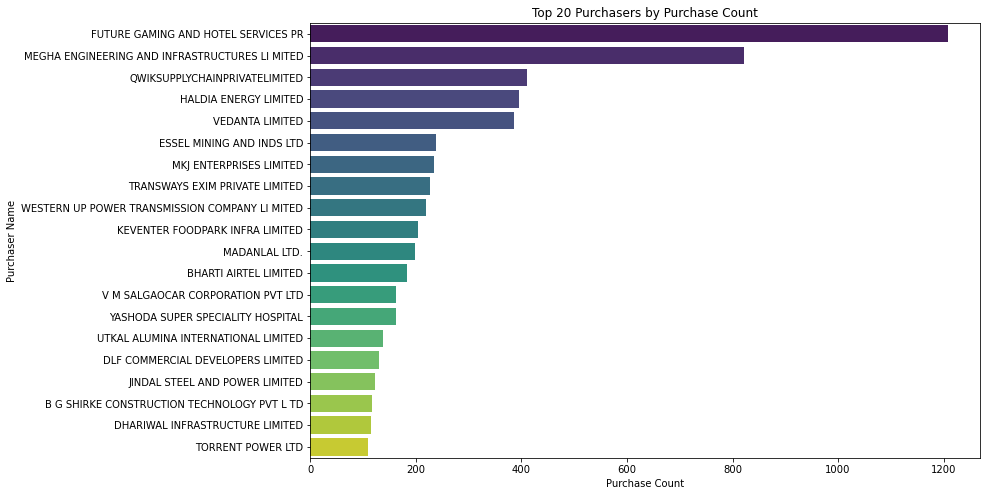

In [54]:
# Create a horizontal bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Purchase Count', y='Purchaser Name', data=top_purchasers, palette='viridis')
plt.xlabel('Purchase Count')
plt.ylabel('Purchaser Name')
plt.title('Top 20 Purchasers by Purchase Count')
plt.show()



In [55]:
# Group by 'Year' and sum the 'Denomination' column
investment_sum = df.groupby('Year')['Denomination'].sum().reset_index(name='Total Purchase')

# Convert 'Total Investment' to lakhs
investment_sum['Total Purchase (Lakhs)'] = investment_sum['Total Purchase'] / 100000

# Convert 'Total Investment' to crores
investment_sum['Total Purchase (Crore)'] = investment_sum['Total Purchase'] / 10000000


investment_sum['Total Purchase (Crore)'] = investment_sum['Total Purchase (Crore)'].round(2)


# Convert 'Total Investment' to millions
# investment_sum['Total Investment (Millions)'] = investment_sum['Total Investment'] / 1000000



# Display the converted data
print(investment_sum)


   Year  Total Purchase  Total Purchase (Lakhs)  Total Purchase (Crore)
0  2019     17661280000               176612.80                 1766.13
1  2020      3639601000                36396.01                  363.96
2  2021     15022927000               150229.27                 1502.29
3  2022     37048576000               370485.76                 3704.86
4  2023     42464745000               424647.45                 4246.47
5  2024      5718003000                57180.03                  571.80


## Total Purchase (Crore) by Year 

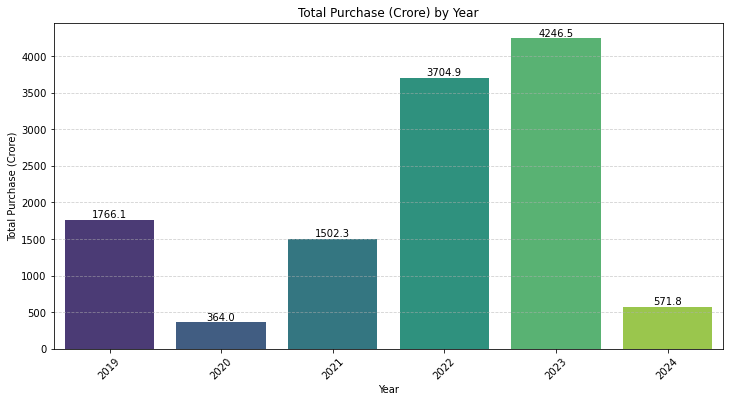

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Total Purchase (Crore)', data=investment_sum, palette='viridis')

# Add text labels for each bar
for index, row in investment_sum.iterrows():
    plt.text(index, row['Total Purchase (Crore)'] + 0.5, f'{row["Total Purchase (Crore)"]:.1f}', 
             ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Total Purchase (Crore)')
plt.title('Total Purchase (Crore) by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Total Purchase (Crore)', data=investment_sum, marker='o', markersize=10, color='red')
plt.xlabel('Year')
plt.ylabel('Total Purchase (Crore)')
plt.title('Total Purchase (Crore) by Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on the points
for x, y in zip(investment_sum['Year'], investment_sum['Total Purchase (Crore)']):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom')

plt.show()


In [57]:
df

,Date of Purchase,Purchaser Name,Denomination,Year,Denomination(Crore)
0,2019-04-12,A B C INDIA LIMITED,100000,2019,0.01
1,2019-04-12,A B C INDIA LIMITED,100000,2019,0.01
2,2019-04-12,A B C INDIA LIMITED,1000000,2019,0.10
3,2019-04-12,A B C INDIA LIMITED,1000000,2019,0.10
4,2019-04-12,A B C INDIA LIMITED,100000,2019,0.01
...,...,...,...,...,...
18866,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00
18867,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00
18868,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00
18869,2024-01-11,WESTWELL GASES PRIVATE LIMITED,10000000,2024,1.00
